# Data cleanings

In [45]:
import pandas as pd
import re
import string

In [46]:
data_train = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/train.csv"
)

data_test = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/test.csv"
)



In [47]:
data_train.head()

,Subject,Body,Label
0,An Exciting Opportunity to Engage in a Persona...,"Dear David,\n\nI hope this email finds you in ...",Legitimate
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia,\n\nWe hope this email finds you we...",Phishing
2,Important Account Notification â€“ Action Requ...,"Dear Toni, \n\nI hope this message finds you w...",Legitimate
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea,\n\nI hope this communication fin...",Legitimate
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, \n\nI hope this email finds yo...",Legitimate


## List function for Data cleaning

In [48]:
def replace_new_line_symbol(text):
    return text.replace('\n', ' ')

## Combine function into clean_data

In [49]:
def clean_data(data):
    data['Subject'] = data['Subject'].apply(replace_new_line_symbol)
    data['Body'] = data['Body'].apply(replace_new_line_symbol)
    return data

## Display Clean Data

In [50]:
data_train = clean_data(data_train)
data_test = clean_data(data_test)
data_train.head()

,Subject,Body,Label
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate


# Feature Extraction base on Paper

## List function for each Feature Extraction

In [51]:
def imperative_verbs_count(text):

    pattern = r'\b(click|verify|submit|download|update)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [52]:
def clause_density(text):
  linking_words = [
    "and", "but", "or", "nor", "for", "so", "yet",
    "although", "though", "even though", "while", "whereas", "if",
    "unless", "until", "before", "after", "since", "when", "whenever",
    "where", "wherever", "because", "as", "since", "in order that",
    "so that", "that", "whether", "as if", "as though", "rather than",
    "whether or not", "however", "moreover", "furthermore", "therefore",
    "consequently", "hence", "thus", "otherwise", "indeed", "in fact",
    "for example", "for instance", "in addition", "besides", "also",
    "finally", "lastly", "first", "second", "next", "then", "afterward",
    "meanwhile", "subsequently", "otherwise", "on the other hand",
    "in contrast", "conversely", "similarly", "likewise", "as well as",
    "in conclusion", "to summarize", "in short", "above all", "namely",
    "i.e.", "e.g.", "specifically", "in particular", "on the whole", "in general"
]
  text = text.lower()
  linking_word_count = 0;punctuation_count = 0
  for word in linking_words:
      linking_word_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))

  else:
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
      punctuation_count = 1
    return (linking_word_count / (punctuation_count ))

In [53]:
def first_person_pronoun_count(text):

    pattern = r'\b(i|we)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [54]:
def pronoun_density(text):
  pronouns = [
    "i", "me", "my", "mine", "myself",
    "you", "your", "yours", "yourself",
    "he", "him", "his", "himself",
    "she", "her", "hers", "herself",
    "it", "its", "itself",
    "we", "us", "our", "ours", "ourselves",
    "they", "them", "their", "theirs", "themselves",
    "who", "whom", "whose",
    "which", "what",
    "this", "that", "these", "those",
    "everyone", "everybody", "everything",
    "someone", "somebody", "something",
    "anyone", "anybody", "anything",
    "no one", "nobody", "nothing",
    "all", "any", "both", "few", "many", "most", "several", "some", "such",
    "one", "none"
]
  text = text.lower()
  n_words = len(re.findall(r'\b\w+\b', text))
  pronoun_count = 0
  for word in pronouns:
    pronoun_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))
  if n_words == 0:
    return 0
  else:
    return pronoun_count / n_words

In [55]:
def urgency_markers_count(text):

    pattern = r'\b(urgent|asap|immediately)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [56]:
def sentence_complexity_ratio(text):
  words = [
    "and", "but", "or", "because"
]
  text = text.lower()
  words_counts = 0;punctuation_count = 0
  for word in words:
      words_counts += len(re.findall(r'\b' + re.escape(word) + r'\b', text))

  else:
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
      punctuation_count = 1
    return (words_counts / (punctuation_count ))

In [57]:
def second_person_pronoun_count(text):

    pattern = r'\b(you)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [58]:
def freq(text):

    pattern = r'[.,!:()/"\\-]'

    matches = re.findall(pattern, text)

    return len(matches)

In [59]:
def average_sentence_length(text):
    punctuation_count = 0; n_words = 0
    n_words = len(re.findall(r'\b\w+\b', text))
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
        punctuation_count = 1
    return n_words/punctuation_count

In [60]:
def comma_count(text):

    pattern = r'[,]'

    matches = re.findall(pattern, text)

    return len(matches)

In [61]:
def colon_count(text):

    pattern = r'[:]'

    matches = re.findall(pattern, text)

    return len(matches)

In [62]:
def semicolon_count(text):

  pattern = r'[;]'

  matches = re.findall(pattern, text)

  return len(matches)


In [63]:
def uppercase_word_ratio(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    if len(tokens) == 0:
        return 0.0

    uppercase_words = [
        t for t in tokens
        if t.isalpha() and t.isupper() and len(t) >= 3
    ]
    return len(uppercase_words) / len(tokens)

In [64]:
def word_count(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    return len(tokens)

In [65]:
def character_count(text):
    text = str(text)
    return len(text)

In [66]:
def average_word_lenght(data):
    return data['character_count']/data['word_count']

In [67]:
def sentence_count(text):
    text = str(text)
    sentences = re.split(r"[.!?]+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

In [68]:
def number_of_pronouns(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    pronouns = {"i", "you", "he", "she", "it", "we", "they"}
    return sum(1 for t in tokens if t in pronouns)

In [69]:
def modal_verbs_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    modal_verbs = {"can", "could", "should"}
    return sum(1 for t in tokens if t in modal_verbs)


In [70]:
def uncertainty_adverbs_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    uncertainty_words = {"maybe", "possibly", "perhaps"}
    return sum(1 for t in tokens if t in uncertainty_words)

In [71]:
def technical_jargon_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    jargon_words = {"security", "account", "update", "technical"}
    return sum(1 for t in tokens if t in jargon_words)

In [72]:
def promotional_words_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    promo_words = {"offer", "deal", "free"}
    return sum(1 for t in tokens if t in promo_words)

In [73]:
def politeness_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"please", "thank", "thanks", "appreciate"}
    return sum(1 for t in tokens if t in markers)

In [74]:
def aggressiveness_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"must", "now", "immediately"}
    return sum(1 for t in tokens if t in markers)

In [75]:
def conditional_phrases_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"if", "unless"}
    return sum(1 for t in tokens if t in markers)

In [76]:
def personalisation_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"you", "your"}
    return sum(1 for t in tokens if t in markers)

In [77]:
def label_value(text):
    if text == "Legitimate":
        return 0
    else :
        return 1

## Combine into feature_extraction function

In [78]:
def feature_extraction(data):
    data['imperative_verbs_count'] = data['Subject'].apply(imperative_verbs_count)+data['Body'].apply(imperative_verbs_count)
    data['first_person_pronoun_count'] = data['Subject'].apply(first_person_pronoun_count)+data['Body'].apply(first_person_pronoun_count)
    data['clause_density'] = data['Subject'].apply(clause_density)+data['Body'].apply(clause_density)
    data['pronoun_density'] = data['Subject'].apply(pronoun_density)+data['Body'].apply(pronoun_density)
    data['urgency_markers_count'] = data['Subject'].apply(urgency_markers_count)+data['Body'].apply(urgency_markers_count)
    data['sentence_complexity_ratio'] = data['Subject'].apply(sentence_complexity_ratio)+data['Body'].apply(sentence_complexity_ratio)
    data['second_person_pronoun_count'] = data['Subject'].apply(second_person_pronoun_count)+data['Body'].apply(second_person_pronoun_count)
    data['freq'] = data['Subject'].apply(freq)+data['Body'].apply(freq)
    data['average_sentence_length'] = data['Subject'].apply(average_sentence_length)+data['Body'].apply(average_sentence_length)
    data['comma_count'] = data['Subject'].apply(comma_count)+data['Body'].apply(comma_count)
    data['colon_count'] = data['Subject'].apply(colon_count)+data['Body'].apply(colon_count)
    data['semicolon_count'] = data['Subject'].apply(semicolon_count)+data['Body'].apply(semicolon_count)
    data['uppercase_word_ratio'] = data['Subject'].apply(uppercase_word_ratio)+data['Body'].apply(uppercase_word_ratio)
    data['word_count'] = data['Subject'].apply(word_count)+data['Body'].apply(word_count)
    data['character_count'] = data['Subject'].apply(character_count)+data['Body'].apply(character_count)
    data['average_word_lenght'] = average_word_lenght(data)
    data['sentence_count'] = data['Subject'].apply(sentence_count)+data['Body'].apply(sentence_count)
    data['number_of_pronouns'] = data['Subject'].apply(number_of_pronouns)+data['Body'].apply(number_of_pronouns)
    data['modal_verbs_count'] = data['Subject'].apply(modal_verbs_count)+data['Body'].apply(modal_verbs_count)
    data['uncertainty_adverbs_count'] = data['Subject'].apply(uncertainty_adverbs_count)+data['Body'].apply(uncertainty_adverbs_count)
    data['technical_jargon_count'] = data['Subject'].apply(technical_jargon_count)+data['Body'].apply(technical_jargon_count)
    data['promotional_words_count'] = data['Subject'].apply(promotional_words_count)+data['Body'].apply(promotional_words_count)
    data['politeness_markers_count'] = data['Subject'].apply(politeness_markers_count)+data['Body'].apply(politeness_markers_count)
    data['aggressiveness_markers_count'] = data['Subject'].apply(aggressiveness_markers_count)+data['Body'].apply(aggressiveness_markers_count)
    data['conditional_phrases_count'] = data['Subject'].apply(conditional_phrases_count)+data['Body'].apply(conditional_phrases_count)
    data['personalisation_markers_count'] = data['Subject'].apply(personalisation_markers_count)+data['Body'].apply(personalisation_markers_count)
    data['label_value'] = data['Label'].apply(label_value)
    return data

## Display dataset after do feature extraction

In [79]:
data_train = feature_extraction(data_train)
data_test = feature_extraction(data_test)
data_train.head()

,Subject,Body,Label,imperative_verbs_count,first_person_pronoun_count,clause_density,pronoun_density,urgency_markers_count,sentence_complexity_ratio,second_person_pronoun_count,...,number_of_pronouns,modal_verbs_count,uncertainty_adverbs_count,technical_jargon_count,promotional_words_count,politeness_markers_count,aggressiveness_markers_count,conditional_phrases_count,personalisation_markers_count,label_value
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate,0,12,1.588235,0.179191,0,0.823529,14,...,28,1,0,2,0,4,0,1,25,0
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing,1,11,0.740741,0.159236,0,0.185185,14,...,26,1,0,0,2,4,0,2,21,1
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate,1,10,1.666667,0.190972,1,0.800000,6,...,18,3,0,9,1,3,1,0,17,0
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate,0,13,1.421053,0.163636,0,0.684211,11,...,25,2,0,0,1,2,0,0,17,0
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate,0,12,1.375000,0.190769,0,0.750000,14,...,30,3,0,0,0,1,0,1,20,0


# Logistic Regression

In [80]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train = data_train.drop(['Subject','Body','Label'], axis=1)
X_test = data_test.drop(['Subject','Body','Label'], axis=1)
y_train = data_train['label_value']
y_test = data_test['label_value']


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("AUC Score:", round(auc, 2))
print("\nConfusion Matrix:\n", conf_matrix)

report_dict = classification_report(y_test, y_pred, output_dict=True)
for k in report_dict.keys():
    if isinstance(report_dict[k], dict):

        report_dict[k].pop('support', None)

        for metric in ['precision','recall','f1-score']:
            if metric in report_dict[k]:
                report_dict[k][metric] = round(report_dict[k][metric], 2)

report_df = pd.DataFrame(report_dict).transpose()
print("\nClassification Report :\n", report_df)



Accuracy: 0.88
AUC Score: 0.95

Confusion Matrix:
 [[12  1]
 [ 2 11]]

Classification Report :
               precision    recall  f1-score
0              0.860000  0.920000  0.890000
1              0.920000  0.850000  0.880000
accuracy       0.884615  0.884615  0.884615
macro avg      0.890000  0.880000  0.880000
weighted avg   0.890000  0.880000  0.880000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [81]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Use a Pipeline to ensure scaling prevents data leakage
# We use class_weight='balanced' to handle potential uneven datasets
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
)

# Train
svm_pipeline.fit(X_train, y_train)

# Predict
y_pred = svm_pipeline.predict(X_test)
y_proba = svm_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("===== Support Vector Machine (Linear) =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

===== Support Vector Machine (Linear) =====
Accuracy: 1.0000
AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        13

    accuracy                         1.0000        26
   macro avg     1.0000    1.0000    1.0000        26
weighted avg     1.0000    1.0000    1.0000        26



/tmp/ipython-input-3562263033.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)


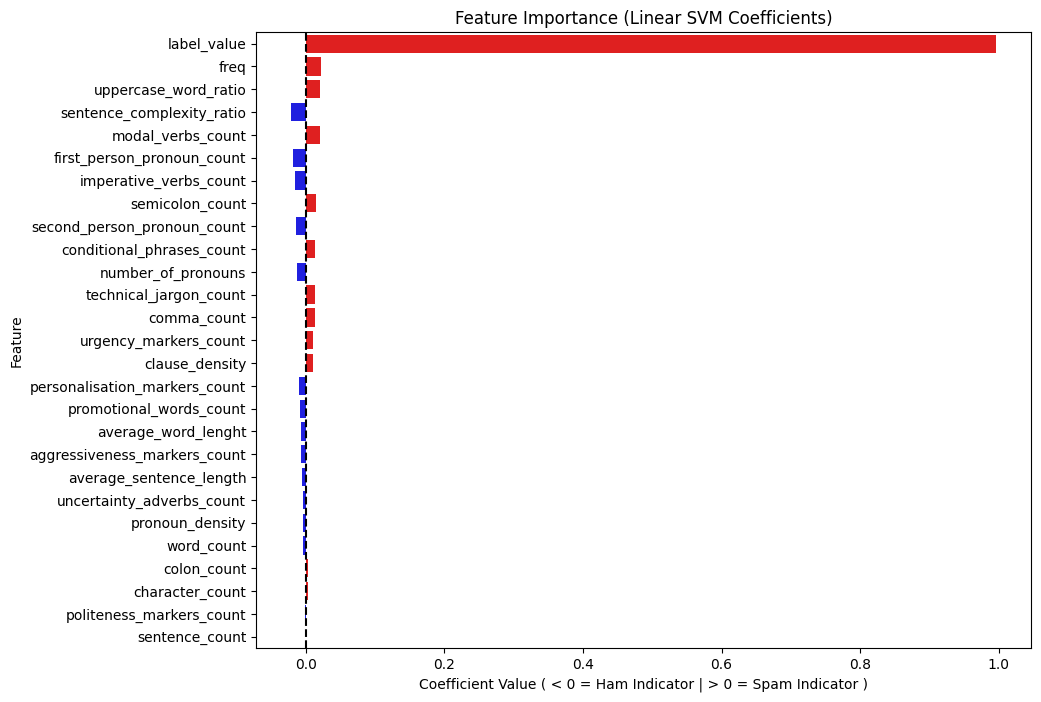

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the SVC model and the coefficients from the pipeline
# 'svc' is the automatic name given to the SVC step in make_pipeline
model_step = svm_pipeline.named_steps['svc']
coefficients = model_step.coef_[0]

# 2. Map coefficients to feature names
# If X_train is a DataFrame, use column names. If numpy, use indices.
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# 3. Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# 4. Sort by absolute value to find the most influential features overall
# (We want to see the strongest predictors, whether they are Spam OR Ham)
importance_df['Abs_Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False)

# 5. Visualization
plt.figure(figsize=(10, 8))

# Create a color mapping: Red for Spam indicators (+), Blue for Ham indicators (-)
colors = ['red' if x > 0 else 'blue' for x in importance_df['Importance']]

sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)

plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value ( < 0 = Ham Indicator | > 0 = Spam Indicator )')
plt.axvline(x=0, color='black', linestyle='--') # Center line
plt.show()

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [84]:
rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# เทรนโมเดล
rf_clf.fit(X_train, y_train)

# ทำนาย label ปกติ
y_pred_rf = rf_clf.predict(X_test)

# ทำนายเป็นความน่าจะเป็นของคลาส 1 (spam)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# คำนวณ AUC (ROC-AUC)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC (ROC-AUC):", auc_rf)   # <--- ตรงนี้คือ AUC ที่อยากได้
print("\nClassification report")
print(classification_report(y_test, y_pred_rf, digits=4))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))


===== Random Forest =====
Accuracy: 1.0
AUC (ROC-AUC): 1.0

Classification report
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        13

    accuracy                         1.0000        26
   macro avg     1.0000    1.0000    1.0000        26
weighted avg     1.0000    1.0000    1.0000        26

Confusion matrix
[[13  0]
 [ 0 13]]


# XGBoost

# Add on Feature Extraction

## List new Feature Extraction

In [85]:
def url_count(text):
    text = str(text)
    pattern = re.compile(
        r"(https?://\S+|www\.\S+|\b\S+\.(com|net|org|info|biz|co|io|xyz)\b)",
        re.IGNORECASE
    )
    return len(pattern.findall(text))

In [86]:
def currency_symbol_count(text):
    text = str(text)
    pattern = re.compile(r"[$€£¥฿]")
    return len(pattern.findall(text))

In [87]:
def spam_keyword_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)

    spam_keywords = {
        "free", "win", "winner", "prize", "bonus",
        "lottery", "cash", "credit", "offer", "deal"
    }

    return sum(1 for t in tokens if t in spam_keywords)

In [88]:
def digit_char_ratio(text):
    text = str(text)
    chars = [c for c in text if not c.isspace()]
    if len(chars) == 0:
        return 0.0
    digit_chars = [c for c in chars if c.isdigit()]
    return len(digit_chars) / len(chars)

In [89]:
def email_address_count(text):
    text = str(text)
    pattern = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
    return len(pattern.findall(text))

In [90]:
def average_word_lenght_by_part(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    if not tokens:
        return 0.0
    total_chars = sum(len(t) for t in tokens)
    return total_chars / len(tokens)

## Combine new Feature into Feature in Paper

In [91]:
def new_feature(data):
    data['url_count'] = data['Subject'].apply(url_count)+data['Body'].apply(url_count)
    data['currency_symbol_count'] = data['Subject'].apply(currency_symbol_count)+data['Body'].apply(currency_symbol_count)
    data['spam_keyword_count'] = data['Subject'].apply(spam_keyword_count)+data['Body'].apply(spam_keyword_count)
    data['digit_char_ratio'] = data['Subject'].apply(digit_char_ratio)+data['Body'].apply(digit_char_ratio)
    data['email_address_count'] = data['Subject'].apply(email_address_count)+data['Body'].apply(email_address_count)
    data['average_word_lenght_Subjects'] = data['Subject'].apply(average_word_lenght_by_part)
    data['average_word_lenght_Body'] = data['Body'].apply(average_word_lenght_by_part)
    return data

In [92]:
data_train = new_feature(data_train)
data_test = new_feature(data_test)
data_train.head()

,Subject,Body,Label,imperative_verbs_count,first_person_pronoun_count,clause_density,pronoun_density,urgency_markers_count,sentence_complexity_ratio,second_person_pronoun_count,...,conditional_phrases_count,personalisation_markers_count,label_value,url_count,currency_symbol_count,spam_keyword_count,digit_char_ratio,email_address_count,average_word_lenght_Subjects,average_word_lenght_Body
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate,0,12,1.588235,0.179191,0,0.823529,14,...,1,25,0,0,5,0,0.000000,0,5.700000,4.994220
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing,1,11,0.740741,0.159236,0,0.185185,14,...,2,21,1,1,0,2,0.005928,1,7.571429,4.821656
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate,1,10,1.666667,0.190972,1,0.800000,6,...,0,17,0,0,1,1,0.004030,0,7.166667,5.076389
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate,0,13,1.421053,0.163636,0,0.684211,11,...,0,17,0,0,0,1,0.000000,0,8.714286,5.527273
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate,0,12,1.375000,0.190769,0,0.750000,14,...,1,20,0,0,2,0,0.000000,0,11.000000,5.104615


# Choose Best Model and add new Feature Extraction